In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

# Exercises

### Using your store items data you acquired in lesson 1 exercises:

1. Convert date column to datetime format.

In [2]:
df = get_store_data()

In [3]:
df.head()

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [4]:
df.shape

(913000, 14)

In [5]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

2. Plot the distribution of sale_amount and item_price.

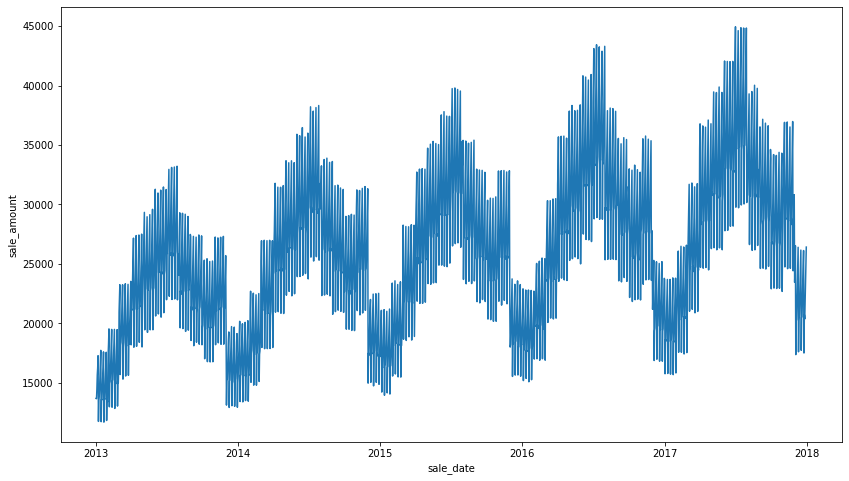

In [6]:
plt.figure(figsize=(14,8))
by_date = df.groupby(['sale_date'])['sale_amount'].sum().reset_index()
sns.lineplot(data=by_date, x='sale_date', y='sale_amount')

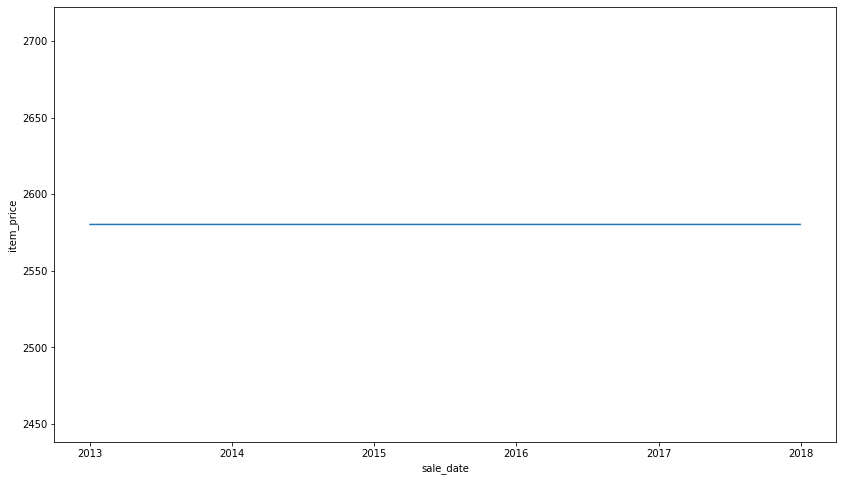

In [7]:
plt.figure(figsize=(14,8))
by_date = df.groupby(['sale_date'])['item_price'].sum().reset_index()
sns.lineplot(data=by_date, x='sale_date', y='item_price')

In [8]:
by_date

,sale_date,item_price
0,2013-01-01 00:00:00+00:00,2580.2
1,2013-01-02 00:00:00+00:00,2580.2
2,2013-01-03 00:00:00+00:00,2580.2
3,2013-01-04 00:00:00+00:00,2580.2
4,2013-01-05 00:00:00+00:00,2580.2
...,...,...
1821,2017-12-27 00:00:00+00:00,2580.2
1822,2017-12-28 00:00:00+00:00,2580.2
1823,2017-12-29 00:00:00+00:00,2580.2
1824,2017-12-30 00:00:00+00:00,2580.2


3. Set the index to be the datetime variable.

In [9]:
df = df.sort_values('sale_date').set_index('sale_date')

In [10]:
df.head(15)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01 00:00:00+00:00,45.0,314073,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,34.0,332333,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,29.0,350593,Usda Produce,20,Plums Black,5.62,204040000000,204040000000,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,32.0,107735,Sally Hansen,6,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,74170388732,74170388732,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01 00:00:00+00:00,25.0,368853,Doctors Best,21,Doctors Best Best Curcumin C3 Complex 1000mg T...,8.09,753950001954,753950001954,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,50.0,387113,Betty Crocker,22,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,16000288829,16000288829,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


4. Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [11]:
df['month'] = df.index.month

In [12]:
df['day_of_week'] = df.index.day_name()

In [13]:
df.head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [14]:
df['sales_total'] = df.sale_amount * df.item_price

In [15]:
df.head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,30.16
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday,308.48


6. Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [16]:
df['day_sales_diff'] = df.sale_amount.diff(1)

In [17]:
df.head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total,day_sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,30.16,13.0
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday,308.48,6.0


7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

### Using the OPS data acquired in lesson 1 exercises:

1. Convert date column to datetime format.

2. Plot the distribution of each of your variables.

3. Set the index to be the datetime variable.

4. Add a month and a year column to your dataframe.

5. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

### Install and use the vega_datasets for the next exercise
For the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

2. Write the code necessary to visualize the minimum temperature over time.

3. Write the code necessary to visualize the maximum temperature over time.

4. Which month is the coldest, on average?

5. Which month has the highest average temperature?

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

Use the Vega_Datasets to work with the flights_20k data
data.flights_20k()
1. Convert any negative delays to 0.

2. Which hour of the day has the highest average delay?

3. Does the day of the week make a difference in the delay amount?

4. Does the month make a difference in the delay amount?